### Basic Corpus processing and tokenization for English, Spanish, and Swedish.

In [ ]:
# Read the three corpora(English, Spanish, Swedish) download from the ELTeC corpora https://zenodo.org/records/4662444
# save the raw text in three files
from tei_reader import TeiReader
import glob
reader = TeiReader()
with open('en.txt','w',encoding='utf8') as f:
    for file in glob.glob('ELTeC-eng-1.0.1/level0/*xml'):
        eng = reader.read_file(file)
        f.write(eng.text + '\n')
with open('sp.txt','w',encoding='utf8') as f:
    for file in glob.glob('ELTeC-spa-0.9.1/level1/*xml'):
        spa = reader.read_file(file)
        f.write(spa.text + '\n')
with open('swe.txt','w',encoding='utf8') as f:
    for file in glob.glob('ELTeC-swe-0.7.1/level1/*xml'):
        swe = reader.read_file(file)
        f.write(swe.text + '\n')

In [2]:
# Tokenizers based on regexps for the three languages  
import re
def reg_tokenizer(file, pattern):
    with open(file, 'r',encoding='utf8') as f:
        content = f.read()
    tokens = re.findall(pattern, content)
    return tokens

#python 3.12.4
pattern_eng = r'(?:[A-Z]\.)+|\d+(?:,\d+)*(?:\.\d+)?|[\'‘’][a-zA-Z]{1,2}|\w+(?:-\w+)*|\.{3}|[^\w\s]'
pattern_spa = r'\w+\.º|\w+\.ª|\d+(?:,\d+)*(?:\.\d+)?|\w+(?:-\w+)*|\.{3}|[^\w\s]'
pattern_swe = r'\d+(?:,\d+)*(?:\.\d+)?|\w+(?:-\w+)*|\.{3}|[^\w\s]'

print(reg_tokenizer('en.txt',pattern_eng)[:100])
print(reg_tokenizer('sp.txt',pattern_spa)[:100])
print(reg_tokenizer('swe.txt',pattern_swe)[:100])

['LADY', 'AUDLEY', "'S", 'SECRET', 'By', 'Mary', 'Elizabeth', 'Braddon', 'CHAPTER', 'I.', 'LUCY', '.', 'It', 'lay', 'down', 'in', 'a', 'hollow', ',', 'rich', 'with', 'fine', 'old', 'timber', 'and', 'luxuriant', 'pastures', ';', 'and', 'you', 'came', 'upon', 'it', 'through', 'an', 'avenue', 'of', 'limes', ',', 'bordered', 'on', 'either', 'side', 'by', 'meadows', ',', 'over', 'the', 'high', 'hedges', 'of', 'which', 'the', 'cattle', 'looked', 'inquisitively', 'at', 'you', 'as', 'you', 'passed', ',', 'wondering', ',', 'perhaps', ',', 'what', 'you', 'wanted', ';', 'for', 'there', 'was', 'no', 'thorough-fare', ',', 'and', 'unless', 'you', 'were', 'going', 'to', 'the', 'Court', 'you', 'had', 'no', 'business', 'there', 'at', 'all', '.', 'At', 'the', 'end', 'of', 'this', 'avenue', 'there', 'was']
['La', 'rampa', 'Novela', 'por', 'Carmen', 'de', 'Burgos', '"', 'Colombine', '"', 'Renacimiento', 'San', 'Marcos', ',', '42', 'Madrid', '1917', 'DEDICATORIA', 'A', 'toda', 'esa', 'multitud', 'de', 'muj

In [4]:
# comparing the output of NLTK tokenizer and regexps tokenizer
import nltk
with open('en.txt', 'r',encoding='utf8') as f:
    content_eng = f.read()
tokens_nltk = nltk.word_tokenize(content_eng)[:2000]
tokens_reg = reg_tokenizer('en.txt',pattern_eng)[:2000]
diff1 = set(tokens_reg).difference(tokens_nltk)
diff2 = set(tokens_nltk).difference(tokens_reg)
print(diff1)
print(diff2)

{'avenues', 'next', 'below', 'ay', 'Mr', '—'}
{'instructress', 'strange', 'accomplishments', 'hand—and', 'numerous', 'secret—a', 'below—a', 'daughters', 'Mr.', 'beard—a', 'that—old', 'fish-pond—a', 'brilliant', 'place—a', 'Her', 'next—and', 'avenues—ay'}


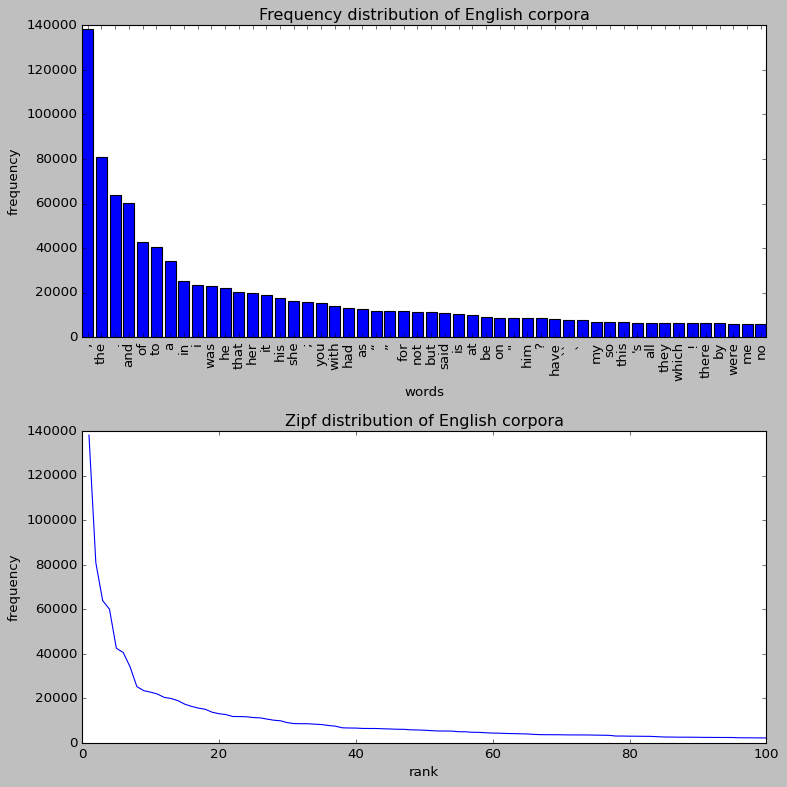

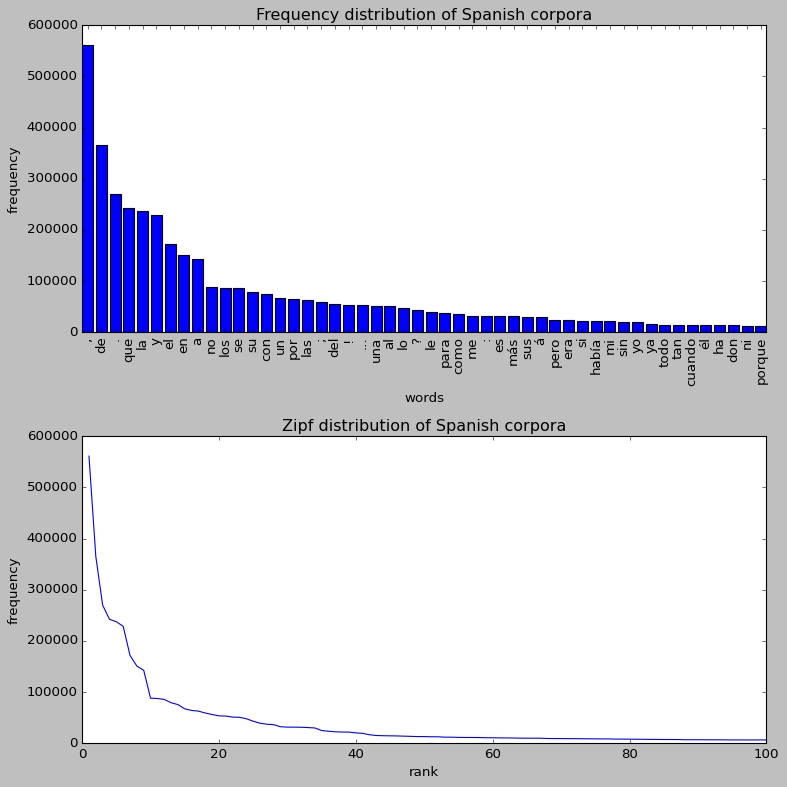

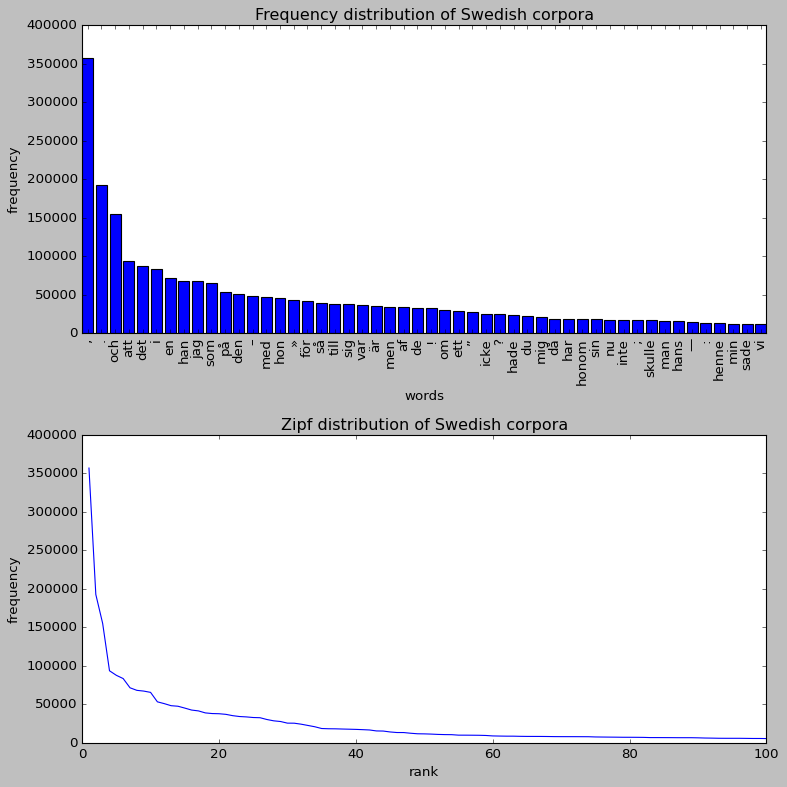

In [ ]:
# Plot the frequency distribution and the zipf distribution
from nltk import FreqDist, word_tokenize
from matplotlib import pyplot as plt

def plot_element(file):
    if file == 'en.txt':
        language = 'English'
    elif file == 'sp.txt':
        language = 'Spanish'
    elif file == 'swe.txt':
        language = 'Swedish'

    with open(file,'r',encoding='utf8') as f:
        content = f.read()
    tokens = word_tokenize(content.lower())
    fdist = FreqDist(tokens)
    f = fdist.most_common()
    words = []
    frequency = []
    for word, freq in f:
        words.append(word)
        frequency.append(freq)
    count = len(fdist)
    rank = range(1, count+1)
    return words, frequency, rank, language

def lan_plot(words, frequency, rank, language):
    plt.style.use('classic')
    plt.figure(figsize=(10, 10))
    
    plt.subplot(2, 1, 1)
    plt.bar(words[:50], frequency[:50]) #plotting all frequency takes too much time, so i just plot the top 50
    plt.xticks(rotation = 90)
    plt.title('Frequency distribution of '+ language + ' corpora')
    plt.xlabel('words')
    plt.ylabel('frequency')

    plt.subplot(2, 1, 2)
    plt.plot(rank[:100], frequency[:100]) #same
    plt.title('Zipf distribution of '+ language + ' corpora')
    plt.xlabel('rank')
    plt.ylabel('frequency')     
    plt.tight_layout()    

en_words, en_freq, en_rank, en_lan = plot_element('en.txt')
lan_plot(en_words, en_freq, en_rank, en_lan)
spa_words, spa_freq, spa_rank, spa_lan = plot_element('sp.txt')
lan_plot(spa_words, spa_freq, spa_rank, spa_lan)
swe_words, swe_freq, swe_rank, swe_lan = plot_element('swe.txt')
lan_plot(swe_words, swe_freq, swe_rank, swe_lan)

In [ ]:
# Sentence Tokenize and remove stop words
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

eng_sent = sent_tokenize(content_eng) 
stopwords = stopwords.words('english')
pre_processed = []

for sentence in eng_sent:
    eng_words = word_tokenize(sentence)
    w = []
    for word in eng_words:
        if word.lower() not in stopwords:
            w.append(word)
    pre_processed.append(' '.join(w))

#POS tagging
tokenize_word = word_tokenize(content_eng)
tagged_word = pos_tag(tokenize_word)